# Exploratory Data Analysis (EDA) for Adobe Customer Segmentation Data

## Introduction
In this notebook, we will perform a detailed Exploratory Data Analysis (EDA) on Adobe customer data to uncover insights into user segments and behavior. Our objective is to gain an in-depth understanding of customer usage patterns, data quality, and relationships between features, setting the foundation for data-driven marketing recommendations.

This EDA will proceed through the following steps:

1. **Data Overview and Initial Exploration**  
   We’ll begin by loading and examining the data structure, data types, and missing values to get a high-level overview.

2. **Data Quality Checks and Cleaning**  
   Data consistency is critical for reliable insights, so we'll address any duplicates, missing values, and inconsistencies, especially in categorical and numerical data.

3. **Univariate Analysis**  
   To understand each feature individually, we’ll analyze numerical and categorical feature distributions. This includes checking for outliers and skewness, which may affect downstream analysis.

4. **Bivariate Analysis**  
   This step focuses on pairwise relationships, helping us uncover significant associations between variables. We’ll explore correlations between numerical features, as well as relationships between categorical and numerical features.

5. **Multivariate Analysis**  
   Here, we’ll study relationships among multiple features simultaneously. Clustering techniques may help us identify patterns across Adobe user segments.

6. **Segment Analysis**  
   We’ll explore user segments, analyzing feature distributions within each segment to gain insights into segment-specific characteristics, which will support tailored marketing efforts.

7. **Feature Engineering Insights**  
   Based on data patterns, we will consider feature transformations, interactions, and dimensionality reduction techniques that could improve modeling.

8. **Insights and Summary**  
   Finally, we will summarize key findings, highlighting the most informative features. This overview will support targeted recommendations for marketing strategies.

Each step will be explained in detail and implemented efficiently, providing a structured approach to preparing Adobe customer data for predictive modeling and insights.


### 1. Data Overview and Initial Exploration

In this first step, we aim to gain a high-level understanding of the dataset structure and contents. This initial exploration provides crucial context for the rest of our analysis, setting us up to identify any immediate issues or notable patterns.

Our goals in this section are as follows:

- **Load and Preview the Data**: We will examine the first and last few rows to understand the general structure of the data, including feature names and a sample of the values.
- **Check Data Shape**: By looking at the dimensions of the dataset (number of rows and columns), we get an early indication of its size and complexity.
- **Review Data Types and Non-null Counts**: Knowing the data types for each column allows us to understand which features are numerical, categorical, or potentially time-based. Additionally, the non-null counts per column give us an early sense of missing values.
- **Summarize Numerical and Categorical Columns**: Descriptive statistics for numerical features (e.g., mean, standard deviation, min, and max) help us understand the range and central tendencies. For categorical features, we review category distributions to understand the spread of values within each category.

This overview provides an essential foundation for the EDA by helping us get acquainted with the data’s structure and potential issues early on.


In [1]:
# importing necessary libraries. 
import pandas as pd 
import numpy as np 

In [7]:
file_path = "C:/Users/mayuo/OneDrive/Documents/Machine Learning by Abraham/interview_take_home/data/adobe_df.csv"
df = pd.read_csv(file_path)
pd.set_option('display.max_columns', None)

In [8]:
df.head()

,index,ps_cluster,market_segment,sub_type,ps_weekday_working_usage,ps_weekday_nonworking_usage,ps_weekend_usage,sv_job_collated,sv_skill_collated,sv_purpose_collated,ps_doc_average_file_size,ps_doc_average_bit_depth,ps_doc_average_layers,ps_doc_average_height,ps_doc_average_width,ps_doc_average_openseconds,generic_email,email_extn,education_domain_1_0,mobile_usage,web_usage,camera_make,camera_model,count_camera_make,count_camera_model,ps_doc_category_watercolor,ps_doc_category_vec_art,ps_doc_category_painting,ps_doc_category_photo,ps_doc_category_typography,ps_doc_category_poster,ps_doc_category_sketch,ps_doc_category_pattern_texture,ps_doc_category_meme,ps_doc_category_adv_banner,ps_doc_category_screenshot,ps_doc_category_3d,total_photo_usage,total_design_usage,total_illustration_usage,total_video_usage,total_3d_usage,machine_ps_max_memory,machine_ps_max_speed,machine_ps_max_monitorcount,machine_ps_max_numprocessors,operating_system,most_used_products,num_used_products,tb_activity_on_acrobat,tb_tot_no_activities,tb_activity_on_after_effects,tb_activity_on_bridge,tb_activity_on_illustrator,tb_activity_on_indesign,tb_activity_on_lightroom,tb_activity_on_media_encoder,tb_activity_on_photoshop,tb_activity_on_premiere_pro,tb_activity_on_adobe_xd
0,0,Photo Enthusiast,COMMERCIAL,Phtoshp Lightrm Bndl,0.621516,0.000000,0.378484,hobbyist,all_three_skill_levels,me_nonprofessional,14.000000,8.0,0.000000,3976.625000,4000.125000,32.687500,True,net,0,0.0,1.0,NIKON CORPORATION,NIKON D90|NIKON D7200|NIKON D7100|NIKON D750|N...,0.005525,0.027624,0.000000,0.000000,0.011050,0.044199,0.005525,0.000000,0.000000,0.000000,0.0,0.000000,0.005525,0.000000,0.552486,0.000000,0.055249,0.000000,0.0,16384,3408,1,8,Windows,photoshop,0.016575,0.000000,0.182320,0.0,0.033149,0.000000,0.000000,0.022099,0.0,0.127072,0.0,0.000000
1,1,Independent Photo Pro,COMMERCIAL,Phtoshp Lightrm Bndl,0.719328,0.014286,0.266387,-1,-1,-1,82.800000,12.8,0.000000,3685.400000,5237.800000,40.600000,True,com,0,0.0,1.0,NIKON CORPORATION,NIKON D810|NIKON D700,0.005525,0.011050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011050,0.0,0.000000,0.000000,0.000000,0.303867,0.000000,0.303867,0.000000,0.0,8192,2196,1,4,Windows,lightroom,0.011050,0.000000,0.237569,0.0,0.000000,0.000000,0.000000,0.198895,0.0,0.038674,0.0,0.000000
2,2,Independent Photo Pro,COMMERCIAL,Phtoshp Lightrm Bndl,0.566488,0.244484,0.189028,-1,experienced,-1,12.500000,8.0,3.300000,3070.600000,2853.400000,1.100000,True,com,0,-1.0,-1.0,Apple|NIKON CORPORATION,iPhone 6 Plus|iPhone 11 Pro Max|NIKON D750|NIK...,0.011050,0.022099,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.348066,0.314917,0.243094,0.000000,0.0,32768,3400,1,8,Mac,lightroom,0.011050,0.000000,0.651934,0.0,0.000000,0.000000,0.000000,0.563536,0.0,0.088398,0.0,0.000000
3,3,Next Generation Creative,COMMERCIAL,Creative Cloud,1.000000,0.000000,0.000000,other,intermediate,org_involved,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,False,com,0,-1.0,-1.0,-1,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.044199,0.000000,0.000000,0.000000,0.0,16384,2800,2,8,Mac,acrobat,0.033149,0.491713,0.143646,0.0,0.000000,0.011050,0.005525,0.000000,0.0,0.038674,0.0,0.005525
4,4,Independent Photo Pro,COMMERCIAL,Creative Cloud,0.999827,0.000056,0.000117,printgraphicdesign,experienced,org_involved,49.728155,8.0,3.786408,4042.912621,3171.563107,2.087379,False,com,0,0.0,1.0,Apple|Canon|EPSON|Hasselblad|Kanvas|Leaf|Motor...,CanoScan 9000F|iPhone 11 Pro Max|iPhone XS Max...,0.066298,0.198895,0.005525,0.176796,0.005525,0.038674,0.104972,0.232044,0.033149,0.049724,0.0,0.016575,0.044199,0.033149,101.657459,5.602210,135.861878,0.403315,0.0,65536,3500,2,12,Mac,illustrator,0.038674,2.331492,4.381215,0.0,0.160221,1.430939,0.022099,0.000000,0.0,1.740331,0.0,1.011050


In [14]:
print(f"Data Shape: {df.shape}")
print('=================================================================================')
pd.set_option('display.max_columns', None)

# Now, display information about data types and non-null counts for each column
df.info()

Data Shape: (12249, 60)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12249 entries, 0 to 12248
Data columns (total 60 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   index                            12249 non-null  int64  
 1   ps_cluster                       12249 non-null  object 
 2   market_segment                   12249 non-null  object 
 3   sub_type                         12249 non-null  object 
 4   ps_weekday_working_usage         12249 non-null  float64
 5   ps_weekday_nonworking_usage      12249 non-null  float64
 6   ps_weekend_usage                 12249 non-null  float64
 7   sv_job_collated                  12249 non-null  object 
 8   sv_skill_collated                12249 non-null  object 
 9   sv_purpose_collated              12249 non-null  object 
 10  ps_doc_average_file_size         12249 non-null  float64
 11  ps_doc_average_bit_depth         12249 non-null  float64

- I can already see some missing date in machine_ps_max_speed and monitor count, but thats just super minor!

In [15]:
df.describe()

,index,ps_weekday_working_usage,ps_weekday_nonworking_usage,ps_weekend_usage,ps_doc_average_file_size,ps_doc_average_bit_depth,ps_doc_average_layers,ps_doc_average_height,ps_doc_average_width,ps_doc_average_openseconds,education_domain_1_0,mobile_usage,web_usage,count_camera_make,count_camera_model,ps_doc_category_watercolor,ps_doc_category_vec_art,ps_doc_category_painting,ps_doc_category_photo,ps_doc_category_typography,ps_doc_category_poster,ps_doc_category_sketch,ps_doc_category_pattern_texture,ps_doc_category_meme,ps_doc_category_adv_banner,ps_doc_category_screenshot,ps_doc_category_3d,total_photo_usage,total_design_usage,total_illustration_usage,total_video_usage,total_3d_usage,num_used_products,tb_activity_on_acrobat,tb_tot_no_activities,tb_activity_on_after_effects,tb_activity_on_bridge,tb_activity_on_illustrator,tb_activity_on_indesign,tb_activity_on_lightroom,tb_activity_on_media_encoder,tb_activity_on_photoshop,tb_activity_on_premiere_pro,tb_activity_on_adobe_xd
count,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000,1.224900e+04,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000
mean,6124.683321,0.520396,0.223865,0.248881,45.606111,9.019079,7.126563,2649.084904,3082.948609,2.723481e+07,0.053555,-0.028018,0.839186,0.018730,0.043482,0.027504,0.103399,0.102385,0.443907,0.061477,0.066067,0.051646,0.117207,0.013377,0.055876,0.095666,0.038271,12.108069,2.921541,6.260604,0.171526,0.014094,0.022870,0.413569,1.135604,0.031570,0.076263,0.135461,0.102412,0.195140,0.017035,0.486237,0.059758,0.007590
std,3536.905307,0.312774,0.229552,0.252690,129.355929,2.589646,35.666944,1468.695794,1746.829144,2.309293e+09,0.228030,0.279923,0.492063,0.021283,0.066472,0.249509,2.216834,0.905882,6.097941,0.511168,0.417547,0.560510,1.031245,0.230906,0.424195,1.014556,1.728026,57.037616,10.370493,36.390253,1.048572,0.285177,0.015582,1.165364,1.186800,0.183799,0.276805,0.294535,0.271221,0.439527,0.093070,0.587353,0.280392,0.070247
min,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.493701e+10,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005525,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3062.000000,0.275485,0.031506,0.044822,4.923077,8.000000,0.200000,1750.000000,1996.800000,1.074074e+00,0.000000,0.000000,1.000000,0.005525,0.006024,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.237569,0.060773,0.066298,0.000000,0.000000,0.011050,0.000000,0.298343,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.116022,0.000000,0.000000
50%,6124.000000,0.526120,0.163423,0.203009,16.750000,8.000000,1.176471,2481.114286,2828.742857,2.929825e+00,0.000000,0.000000,1.000000,0.016575,0.022099,0.000000,0.005525,0.005525,0.016575,0.005525,0.000000,0.000000,0.000000,0.000000,0.000000,0.011050,0.000000,1.441176,0.473684,0.613260,0.000000,0.000000,0.016575,0.000000,0.774648,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.314917,0.000000,0.000000
75%,9188.000000,0.781307,0.361111,0.354798,44.411765,9.000000,4.823529,3359.554054,3925.312500,7.615385e+00,0.000000,0.000000,1.000000,0.027624,0.051546,0.011050,0.047619,0.038674,0.122302,0.033149,0.027624,0.019048,0.033149,0.005525,0.022099,0.060773,0.005525,6.248619,2.143646,2.955801,0.044199,0.000000,0.027624,0.403315,1.591160,0.000000,0.011050,0.104972,0

I am super interested in the -1, does that mean missing values? 

## 2. Data Quality Checks and Cleaning

The goal of this step is to ensure that the dataset is clean, consistent, and ready for analysis. Data quality is crucial for generating reliable insights, so we will address the following key aspects:

1. **Duplicate Rows**: 
   - Duplicate rows can distort analysis by over-representing certain data points. We'll check for any duplicate rows and remove them to ensure each record is unique.

2. **Missing Values**: 
   - Missing values are common in datasets and can impact the quality of analysis. We will identify columns with missing values and choose appropriate strategies to handle them. 
   - Missing values can either be dropped or filled with statistical measures (such as the mean or median for numerical data, and the mode for categorical data).

3. **Inconsistencies in Categorical Variables**: 
   - Categorical data can sometimes have inconsistencies, such as different capitalizations or leading/trailing spaces. These inconsistencies can affect downstream analysis. 
   - We will standardize categorical variables by converting them to lowercase and removing any extra spaces to ensure uniformity.

By performing these quality checks and cleaning procedures, we will ensure that our dataset is consistent, reliable, and ready for further analysis.


In [16]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [19]:
missing_values = df.isna().mean()*100
print(f"Missing values per column: {missing_values}")

Missing values per column: index                              0.000000
ps_cluster                         0.000000
market_segment                     0.000000
sub_type                           0.000000
ps_weekday_working_usage           0.000000
ps_weekday_nonworking_usage        0.000000
ps_weekend_usage                   0.000000
sv_job_collated                    0.000000
sv_skill_collated                  0.000000
sv_purpose_collated                0.000000
ps_doc_average_file_size           0.000000
ps_doc_average_bit_depth           0.000000
ps_doc_average_layers              0.000000
ps_doc_average_height              0.000000
ps_doc_average_width               0.000000
ps_doc_average_openseconds         0.000000
generic_email                      0.000000
email_extn                         0.000000
education_domain_1_0               0.000000
mobile_usage                       0.000000
web_usage                          0.000000
camera_make                        0.000000
camer

So 0.17% from 2 categores has missing data so let explore it to see if we can impute values into it! 

In [24]:
print(df['index'].nunique())

12249


So i can drop the index

In [25]:
df = df.drop('index', axis= 1)
df.head()

,ps_cluster,market_segment,sub_type,ps_weekday_working_usage,ps_weekday_nonworking_usage,ps_weekend_usage,sv_job_collated,sv_skill_collated,sv_purpose_collated,ps_doc_average_file_size,ps_doc_average_bit_depth,ps_doc_average_layers,ps_doc_average_height,ps_doc_average_width,ps_doc_average_openseconds,generic_email,email_extn,education_domain_1_0,mobile_usage,web_usage,camera_make,camera_model,count_camera_make,count_camera_model,ps_doc_category_watercolor,ps_doc_category_vec_art,ps_doc_category_painting,ps_doc_category_photo,ps_doc_category_typography,ps_doc_category_poster,ps_doc_category_sketch,ps_doc_category_pattern_texture,ps_doc_category_meme,ps_doc_category_adv_banner,ps_doc_category_screenshot,ps_doc_category_3d,total_photo_usage,total_design_usage,total_illustration_usage,total_video_usage,total_3d_usage,machine_ps_max_memory,machine_ps_max_speed,machine_ps_max_monitorcount,machine_ps_max_numprocessors,operating_system,most_used_products,num_used_products,tb_activity_on_acrobat,tb_tot_no_activities,tb_activity_on_after_effects,tb_activity_on_bridge,tb_activity_on_illustrator,tb_activity_on_indesign,tb_activity_on_lightroom,tb_activity_on_media_encoder,tb_activity_on_photoshop,tb_activity_on_premiere_pro,tb_activity_on_adobe_xd
0,Photo Enthusiast,COMMERCIAL,Phtoshp Lightrm Bndl,0.621516,0.000000,0.378484,hobbyist,all_three_skill_levels,me_nonprofessional,14.000000,8.0,0.000000,3976.625000,4000.125000,32.687500,True,net,0,0.0,1.0,NIKON CORPORATION,NIKON D90|NIKON D7200|NIKON D7100|NIKON D750|N...,0.005525,0.027624,0.000000,0.000000,0.011050,0.044199,0.005525,0.000000,0.000000,0.000000,0.0,0.000000,0.005525,0.000000,0.552486,0.000000,0.055249,0.000000,0.0,16384,3408,1,8,Windows,photoshop,0.016575,0.000000,0.182320,0.0,0.033149,0.000000,0.000000,0.022099,0.0,0.127072,0.0,0.000000
1,Independent Photo Pro,COMMERCIAL,Phtoshp Lightrm Bndl,0.719328,0.014286,0.266387,-1,-1,-1,82.800000,12.8,0.000000,3685.400000,5237.800000,40.600000,True,com,0,0.0,1.0,NIKON CORPORATION,NIKON D810|NIKON D700,0.005525,0.011050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011050,0.0,0.000000,0.000000,0.000000,0.303867,0.000000,0.303867,0.000000,0.0,8192,2196,1,4,Windows,lightroom,0.011050,0.000000,0.237569,0.0,0.000000,0.000000,0.000000,0.198895,0.0,0.038674,0.0,0.000000
2,Independent Photo Pro,COMMERCIAL,Phtoshp Lightrm Bndl,0.566488,0.244484,0.189028,-1,experienced,-1,12.500000,8.0,3.300000,3070.600000,2853.400000,1.100000,True,com,0,-1.0,-1.0,Apple|NIKON CORPORATION,iPhone 6 Plus|iPhone 11 Pro Max|NIKON D750|NIK...,0.011050,0.022099,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.348066,0.314917,0.243094,0.000000,0.0,32768,3400,1,8,Mac,lightroom,0.011050,0.000000,0.651934,0.0,0.000000,0.000000,0.000000,0.563536,0.0,0.088398,0.0,0.000000
3,Next Generation Creative,COMMERCIAL,Creative Cloud,1.000000,0.000000,0.000000,other,intermediate,org_involved,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,False,com,0,-1.0,-1.0,-1,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.044199,0.000000,0.000000,0.000000,0.0,16384,2800,2,8,Mac,acrobat,0.033149,0.491713,0.143646,0.0,0.000000,0.011050,0.005525,0.000000,0.0,0.038674,0.0,0.005525
4,Independent Photo Pro,COMMERCIAL,Creative Cloud,0.999827,0.000056,0.000117,printgraphicdesign,experienced,org_involved,49.728155,8.0,3.786408,4042.912621,3171.563107,2.087379,False,com,0,0.0,1.0,Apple|Canon|EPSON|Hasselblad|Kanvas|Leaf|Motor...,CanoScan 9000F|iPhone 11 Pro Max|iPhone XS Max...,0.066298,0.198895,0.005525,0.176796,0.005525,0.038674,0.104972,0.232044,0.033149,0.049724,0.0,0.016575,0.044199,0.033149,101.657459,5.602210,135.861878,0.403315,0.0,65536,3500,2,12,Mac,illustrator,0.038674,2.331492,4.381215,0.0,0.160221,1.430939,0.022099,0.000000,0.0,1.740331,0.0,1.011050


I just notice that the missing ones aren't numeric. 

In [35]:
df = df.dropna()
missing_values = df.isna().mean()*100
print(f"Missing values per column: {missing_values}")

Missing values per column: ps_cluster                         0.0
market_segment                     0.0
sub_type                           0.0
ps_weekday_working_usage           0.0
ps_weekday_nonworking_usage        0.0
ps_weekend_usage                   0.0
sv_job_collated                    0.0
sv_skill_collated                  0.0
sv_purpose_collated                0.0
ps_doc_average_file_size           0.0
ps_doc_average_bit_depth           0.0
ps_doc_average_layers              0.0
ps_doc_average_height              0.0
ps_doc_average_width               0.0
ps_doc_average_openseconds         0.0
generic_email                      0.0
email_extn                         0.0
education_domain_1_0               0.0
mobile_usage                       0.0
web_usage                          0.0
camera_make                        0.0
camera_model                       0.0
count_camera_make                  0.0
count_camera_model                 0.0
ps_doc_category_watercolor         0.

Now i have notice that there is -1 in the dataset more than likely a place holder! 

In [36]:
df_new = df.copy()

In [37]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12228 entries, 0 to 12248
Data columns (total 59 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ps_cluster                       12228 non-null  object 
 1   market_segment                   12228 non-null  object 
 2   sub_type                         12228 non-null  object 
 3   ps_weekday_working_usage         12228 non-null  float64
 4   ps_weekday_nonworking_usage      12228 non-null  float64
 5   ps_weekend_usage                 12228 non-null  float64
 6   sv_job_collated                  12228 non-null  object 
 7   sv_skill_collated                12228 non-null  object 
 8   sv_purpose_collated              12228 non-null  object 
 9   ps_doc_average_file_size         12228 non-null  float64
 10  ps_doc_average_bit_depth         12228 non-null  float64
 11  ps_doc_average_layers            12228 non-null  float64
 12  ps_doc_average_height  

In [39]:
df_new.isin(["-1"]).sum()

ps_cluster                            0
market_segment                        0
sub_type                              0
ps_weekday_working_usage              0
ps_weekday_nonworking_usage           0
ps_weekend_usage                      0
sv_job_collated                    4762
sv_skill_collated                  3554
sv_purpose_collated                4783
ps_doc_average_file_size              0
ps_doc_average_bit_depth              0
ps_doc_average_layers                 0
ps_doc_average_height                 0
ps_doc_average_width                  0
ps_doc_average_openseconds            0
generic_email                         0
email_extn                            5
education_domain_1_0                  0
mobile_usage                          0
web_usage                             0
camera_make                         208
camera_model                        208
count_camera_make                     0
count_camera_model                    0
ps_doc_category_watercolor            0


In [40]:
df_new.isin([-1]).sum()

ps_cluster                           0
market_segment                       0
sub_type                             0
ps_weekday_working_usage             9
ps_weekday_nonworking_usage          9
ps_weekend_usage                     9
sv_job_collated                      0
sv_skill_collated                    0
sv_purpose_collated                  0
ps_doc_average_file_size             0
ps_doc_average_bit_depth             0
ps_doc_average_layers                0
ps_doc_average_height                0
ps_doc_average_width                 0
ps_doc_average_openseconds           0
generic_email                        0
email_extn                           0
education_domain_1_0                 5
mobile_usage                       769
web_usage                          769
camera_make                          0
camera_model                         0
count_camera_make                    0
count_camera_model                   0
ps_doc_category_watercolor           0
ps_doc_category_vec_art  

We have a dilemma 

In [41]:
df_new = df_new.replace(["-1", -1], np.nan)
missing_values = df_new.isna().mean()*100
print(f"Missing values per column: {missing_values}")

Missing values per column: ps_cluster                          0.000000
market_segment                      0.000000
sub_type                            0.000000
ps_weekday_working_usage            0.073602
ps_weekday_nonworking_usage         0.073602
ps_weekend_usage                    0.073602
sv_job_collated                    38.943409
sv_skill_collated                  29.064442
sv_purpose_collated                39.115146
ps_doc_average_file_size            0.000000
ps_doc_average_bit_depth            0.000000
ps_doc_average_layers               0.000000
ps_doc_average_height               0.000000
ps_doc_average_width                0.000000
ps_doc_average_openseconds          0.000000
generic_email                       0.000000
email_extn                          0.040890
education_domain_1_0                0.040890
mobile_usage                        6.288845
web_usage                           6.288845
camera_make                         1.701014
camera_model                

Ok that make sense now and we most likely have all the missing part because they are from surveys! 

- So I am going to be doing analysis where by I drop the higherly missing columns, impute with "unknown", use a high level imputation and see how each data set does well. 

In [43]:
# Check unique clusters in 'ps_cluster' and display count distribution
cluster_counts = df_new['ps_cluster'].value_counts()
print("Distribution of clusters in 'ps_cluster':")
print(cluster_counts)


Distribution of clusters in 'ps_cluster':
ps_cluster
Photo Enthusiast                3579
Next Generation Creative        2908
Traditional Graphic Designer    2273
Independent Photo Pro           1899
Interactive Designer            1569
Name: count, dtype: int64


C:\Users\mayuo\AppData\Local\Temp\ipykernel_31540\3753914557.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_cluster = (df.groupby(cluster_column)


,market_segment,sub_type,ps_weekday_working_usage,ps_weekday_nonworking_usage,ps_weekend_usage,sv_job_collated,sv_skill_collated,sv_purpose_collated,ps_doc_average_file_size,ps_doc_average_bit_depth,ps_doc_average_layers,ps_doc_average_height,ps_doc_average_width,ps_doc_average_openseconds,generic_email,email_extn,education_domain_1_0,mobile_usage,web_usage,camera_make,camera_model,count_camera_make,count_camera_model,ps_doc_category_watercolor,ps_doc_category_vec_art,ps_doc_category_painting,ps_doc_category_photo,ps_doc_category_typography,ps_doc_category_poster,ps_doc_category_sketch,ps_doc_category_pattern_texture,ps_doc_category_meme,ps_doc_category_adv_banner,ps_doc_category_screenshot,ps_doc_category_3d,total_photo_usage,total_design_usage,total_illustration_usage,total_video_usage,total_3d_usage,machine_ps_max_memory,machine_ps_max_speed,machine_ps_max_monitorcount,machine_ps_max_numprocessors,operating_system,most_used_products,num_used_products,tb_activity_on_acrobat,tb_tot_no_activities,tb_activity_on_after_effects,tb_activity_on_bridge,tb_activity_on_illustrator,tb_activity_on_indesign,tb_activity_on_lightroom,tb_activity_on_media_encoder,tb_activity_on_photoshop,tb_activity_on_premiere_pro,tb_activity_on_adobe_xd
ps_cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Independent Photo Pro,0.0,0.0,0.105,0.105,0.105,37.072,23.749,37.388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053,0.053,5.793,5.793,1.001,1.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interactive Designer,0.0,0.0,0.064,0.064,0.064,40.854,31.995,40.982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,4.971,4.971,0.255,0.255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Next Generation Creative,0.0,0.0,0.138,0.138,0.138,40.681,33.906,40.715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.034,0.034,7.084,7.084,4.092,4.092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Photo Enthusiast,0.0,0.0,0.028,0.028,0.028,35.233,23.414,35.345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.056,0.056,7.404,7.404,1.369,1.369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Traditional Graphic Designer,0.0,0.0,0.044,0.044,0.044,42.807,34.184,43.159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.044,0.044,4.839,4.839,0.748,0.748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


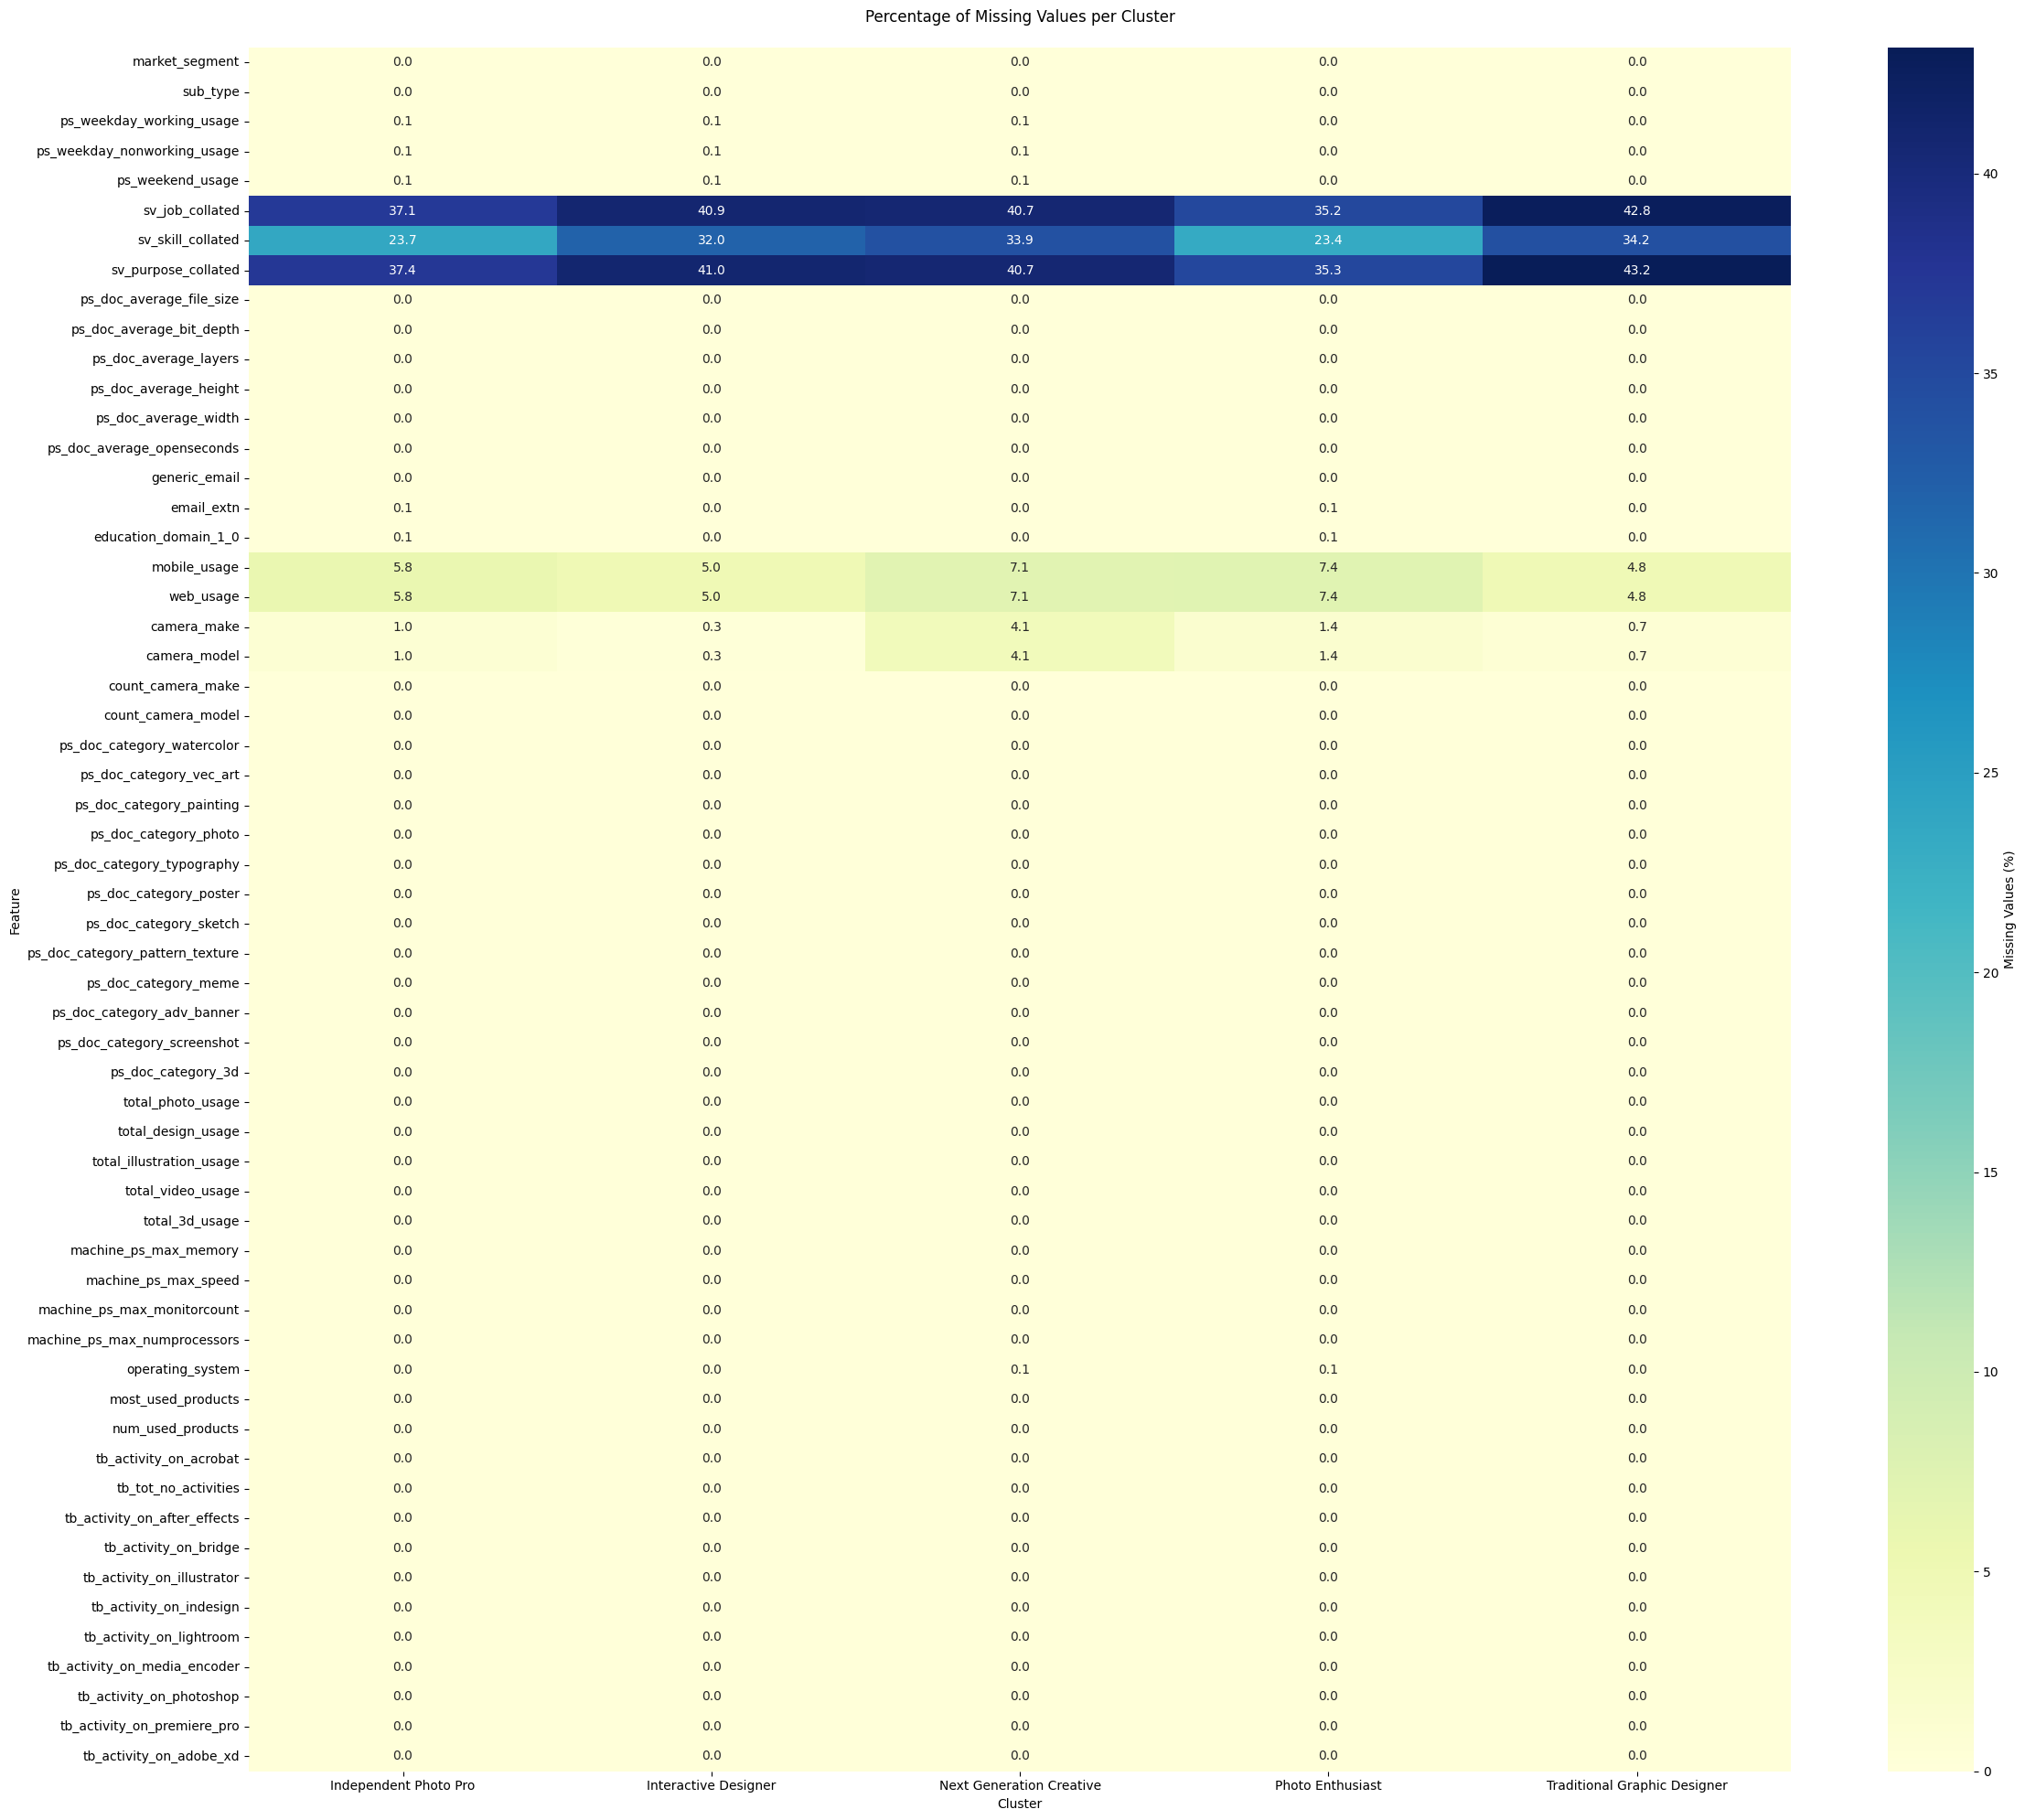

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_missing_values(df, cluster_column='ps_cluster', figsize=(24, 20)):
    # Calculate percentage of missing values per cluster
    missing_by_cluster = (df.groupby(cluster_column)
                         .apply(lambda x: x.isna().mean() * 100)
                         .drop(cluster_column, axis=1)  # Remove cluster column from results
                         .round(3))  # Round to 1 decimal place
    
    # Create heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(missing_by_cluster.T,
                cmap="YlGnBu",
                annot=True,
                fmt=".1f",
                cbar_kws={'label': 'Missing Values (%)'})
    
    plt.title("Percentage of Missing Values per Cluster", pad=20)
    plt.xlabel("Cluster")
    plt.ylabel("Feature")
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    return missing_by_cluster



missing_stats = analyze_missing_values(df_new)
display(missing_stats)  

### Data Preparation Strategy for Handling Survey-Related Missing Values

In order to effectively handle missing values, especially in survey-related columns, we'll create three versions of our dataset. This will allow us to analyze and model the data in different ways to see which approach yields the best results. Here’s an overview of each approach:

1. **Dataset 1 - Dropped Columns**:
   - In this version, we’ll drop columns with high percentages of missing values, specifically those from survey data.
   - **Rationale**: This dataset focuses on retaining only the most complete columns, potentially simplifying the model. However, we might lose some nuanced information that could aid in customer segmentation.

2. **Dataset 2 - Imputation with “Unknown”**:
   - Here, we’ll impute missing survey-related values with a placeholder such as “Unknown” or “Not Specified.”
   - **Rationale**: This approach allows us to retain the survey columns while acknowledging that some users may have genuinely chosen not to respond. By treating missing data as a distinct category, we avoid potentially misleading assumptions while preserving information for analysis.

3. **Dataset 3 - High-Level Imputation Based on Clusters**:
   - For this dataset, we’ll impute missing survey values based on dominant values within clusters or segments (`ps_cluster`, `market_segment`).
   - **Rationale**: This approach aims to leverage existing segmentation to make educated imputations for missing survey data. By assuming that users within the same cluster share similar characteristics, we can impute values in a way that might reflect the typical response patterns for each group.

### Next Steps
Once the three datasets are created, we’ll conduct exploratory data analysis (EDA) on each to assess their impact on data consistency, usability, and modeling outcomes. Each approach has its own strengths:
- The dropped-columns dataset reduces potential noise.
- The “Unknown” imputation provides a neutral treatment of missingness.
- The cluster-based imputation may provide more personalized insights for each segment.

Would you like to proceed with creating these datasets in Python?


In [ ]:
# dropping. 
missing_threshold = 20.0

# Identify columns with missing values above the threshold
columns_to_drop = df_new.columns[df_new.isna().mean()*100 > missing_threshold]

# Drop these columns from the dataframe
df_dropped = df.drop(columns=columns_to_drop)

# Print out the columns that were dropped and check the new dataframe shape
print("Columns dropped due to high missing values:")
print(columns_to_drop)
print("\nNew dataset shape after dropping columns:", df_dropped.shape)


Columns dropped due to high missing values:
Index(['sv_job_collated', 'sv_skill_collated', 'sv_purpose_collated'], dtype='object')

New dataset shape after dropping columns: (12228, 56)


In [52]:
df_dropped.head()

,ps_cluster,market_segment,sub_type,ps_weekday_working_usage,ps_weekday_nonworking_usage,ps_weekend_usage,ps_doc_average_file_size,ps_doc_average_bit_depth,ps_doc_average_layers,ps_doc_average_height,ps_doc_average_width,ps_doc_average_openseconds,generic_email,email_extn,education_domain_1_0,mobile_usage,web_usage,camera_make,camera_model,count_camera_make,count_camera_model,ps_doc_category_watercolor,ps_doc_category_vec_art,ps_doc_category_painting,ps_doc_category_photo,ps_doc_category_typography,ps_doc_category_poster,ps_doc_category_sketch,ps_doc_category_pattern_texture,ps_doc_category_meme,ps_doc_category_adv_banner,ps_doc_category_screenshot,ps_doc_category_3d,total_photo_usage,total_design_usage,total_illustration_usage,total_video_usage,total_3d_usage,machine_ps_max_memory,machine_ps_max_speed,machine_ps_max_monitorcount,machine_ps_max_numprocessors,operating_system,most_used_products,num_used_products,tb_activity_on_acrobat,tb_tot_no_activities,tb_activity_on_after_effects,tb_activity_on_bridge,tb_activity_on_illustrator,tb_activity_on_indesign,tb_activity_on_lightroom,tb_activity_on_media_encoder,tb_activity_on_photoshop,tb_activity_on_premiere_pro,tb_activity_on_adobe_xd
0,Photo Enthusiast,COMMERCIAL,Phtoshp Lightrm Bndl,0.621516,0.000000,0.378484,14.000000,8.0,0.000000,3976.625000,4000.125000,32.687500,True,net,0,0.0,1.0,NIKON CORPORATION,NIKON D90|NIKON D7200|NIKON D7100|NIKON D750|N...,0.005525,0.027624,0.000000,0.000000,0.011050,0.044199,0.005525,0.000000,0.000000,0.000000,0.0,0.000000,0.005525,0.000000,0.552486,0.000000,0.055249,0.000000,0.0,16384,3408,1,8,Windows,photoshop,0.016575,0.000000,0.182320,0.0,0.033149,0.000000,0.000000,0.022099,0.0,0.127072,0.0,0.000000
1,Independent Photo Pro,COMMERCIAL,Phtoshp Lightrm Bndl,0.719328,0.014286,0.266387,82.800000,12.8,0.000000,3685.400000,5237.800000,40.600000,True,com,0,0.0,1.0,NIKON CORPORATION,NIKON D810|NIKON D700,0.005525,0.011050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011050,0.0,0.000000,0.000000,0.000000,0.303867,0.000000,0.303867,0.000000,0.0,8192,2196,1,4,Windows,lightroom,0.011050,0.000000,0.237569,0.0,0.000000,0.000000,0.000000,0.198895,0.0,0.038674,0.0,0.000000
2,Independent Photo Pro,COMMERCIAL,Phtoshp Lightrm Bndl,0.566488,0.244484,0.189028,12.500000,8.0,3.300000,3070.600000,2853.400000,1.100000,True,com,0,-1.0,-1.0,Apple|NIKON CORPORATION,iPhone 6 Plus|iPhone 11 Pro Max|NIKON D750|NIK...,0.011050,0.022099,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.348066,0.314917,0.243094,0.000000,0.0,32768,3400,1,8,Mac,lightroom,0.011050,0.000000,0.651934,0.0,0.000000,0.000000,0.000000,0.563536,0.0,0.088398,0.0,0.000000
3,Next Generation Creative,COMMERCIAL,Creative Cloud,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,False,com,0,-1.0,-1.0,-1,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.044199,0.000000,0.000000,0.000000,0.0,16384,2800,2,8,Mac,acrobat,0.033149,0.491713,0.143646,0.0,0.000000,0.011050,0.005525,0.000000,0.0,0.038674,0.0,0.005525
4,Independent Photo Pro,COMMERCIAL,Creative Cloud,0.999827,0.000056,0.000117,49.728155,8.0,3.786408,4042.912621,3171.563107,2.087379,False,com,0,0.0,1.0,Apple|Canon|EPSON|Hasselblad|Kanvas|Leaf|Motor...,CanoScan 9000F|iPhone 11 Pro Max|iPhone XS Max...,0.066298,0.198895,0.005525,0.176796,0.005525,0.038674,0.104972,0.232044,0.033149,0.049724,0.0,0.016575,0.044199,0.033149,101.657459,5.602210,135.861878,0.403315,0.0,65536,3500,2,12,Mac,illustrator,0.038674,2.331492,4.381215,0.0,0.160221,1.430939,0.022099,0.000000,0.0,1.740331,0.0,1.011050


In [55]:
df_dropped.isna().mean()*100 

ps_cluster                         0.0
market_segment                     0.0
sub_type                           0.0
ps_weekday_working_usage           0.0
ps_weekday_nonworking_usage        0.0
ps_weekend_usage                   0.0
ps_doc_average_file_size           0.0
ps_doc_average_bit_depth           0.0
ps_doc_average_layers              0.0
ps_doc_average_height              0.0
ps_doc_average_width               0.0
ps_doc_average_openseconds         0.0
generic_email                      0.0
email_extn                         0.0
education_domain_1_0               0.0
mobile_usage                       0.0
web_usage                          0.0
camera_make                        0.0
camera_model                       0.0
count_camera_make                  0.0
count_camera_model                 0.0
ps_doc_category_watercolor         0.0
ps_doc_category_vec_art            0.0
ps_doc_category_painting           0.0
ps_doc_category_photo              0.0
ps_doc_category_typograph

C:\Users\mayuo\AppData\Local\Temp\ipykernel_31540\3753914557.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_cluster = (df.groupby(cluster_column)


,market_segment,sub_type,ps_weekday_working_usage,ps_weekday_nonworking_usage,ps_weekend_usage,ps_doc_average_file_size,ps_doc_average_bit_depth,ps_doc_average_layers,ps_doc_average_height,ps_doc_average_width,ps_doc_average_openseconds,generic_email,email_extn,education_domain_1_0,mobile_usage,web_usage,camera_make,camera_model,count_camera_make,count_camera_model,ps_doc_category_watercolor,ps_doc_category_vec_art,ps_doc_category_painting,ps_doc_category_photo,ps_doc_category_typography,ps_doc_category_poster,ps_doc_category_sketch,ps_doc_category_pattern_texture,ps_doc_category_meme,ps_doc_category_adv_banner,ps_doc_category_screenshot,ps_doc_category_3d,total_photo_usage,total_design_usage,total_illustration_usage,total_video_usage,total_3d_usage,machine_ps_max_memory,machine_ps_max_speed,machine_ps_max_monitorcount,machine_ps_max_numprocessors,operating_system,most_used_products,num_used_products,tb_activity_on_acrobat,tb_tot_no_activities,tb_activity_on_after_effects,tb_activity_on_bridge,tb_activity_on_illustrator,tb_activity_on_indesign,tb_activity_on_lightroom,tb_activity_on_media_encoder,tb_activity_on_photoshop,tb_activity_on_premiere_pro,tb_activity_on_adobe_xd
ps_cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Independent Photo Pro,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interactive Designer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Next Generation Creative,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Photo Enthusiast,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Traditional Graphic Designer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


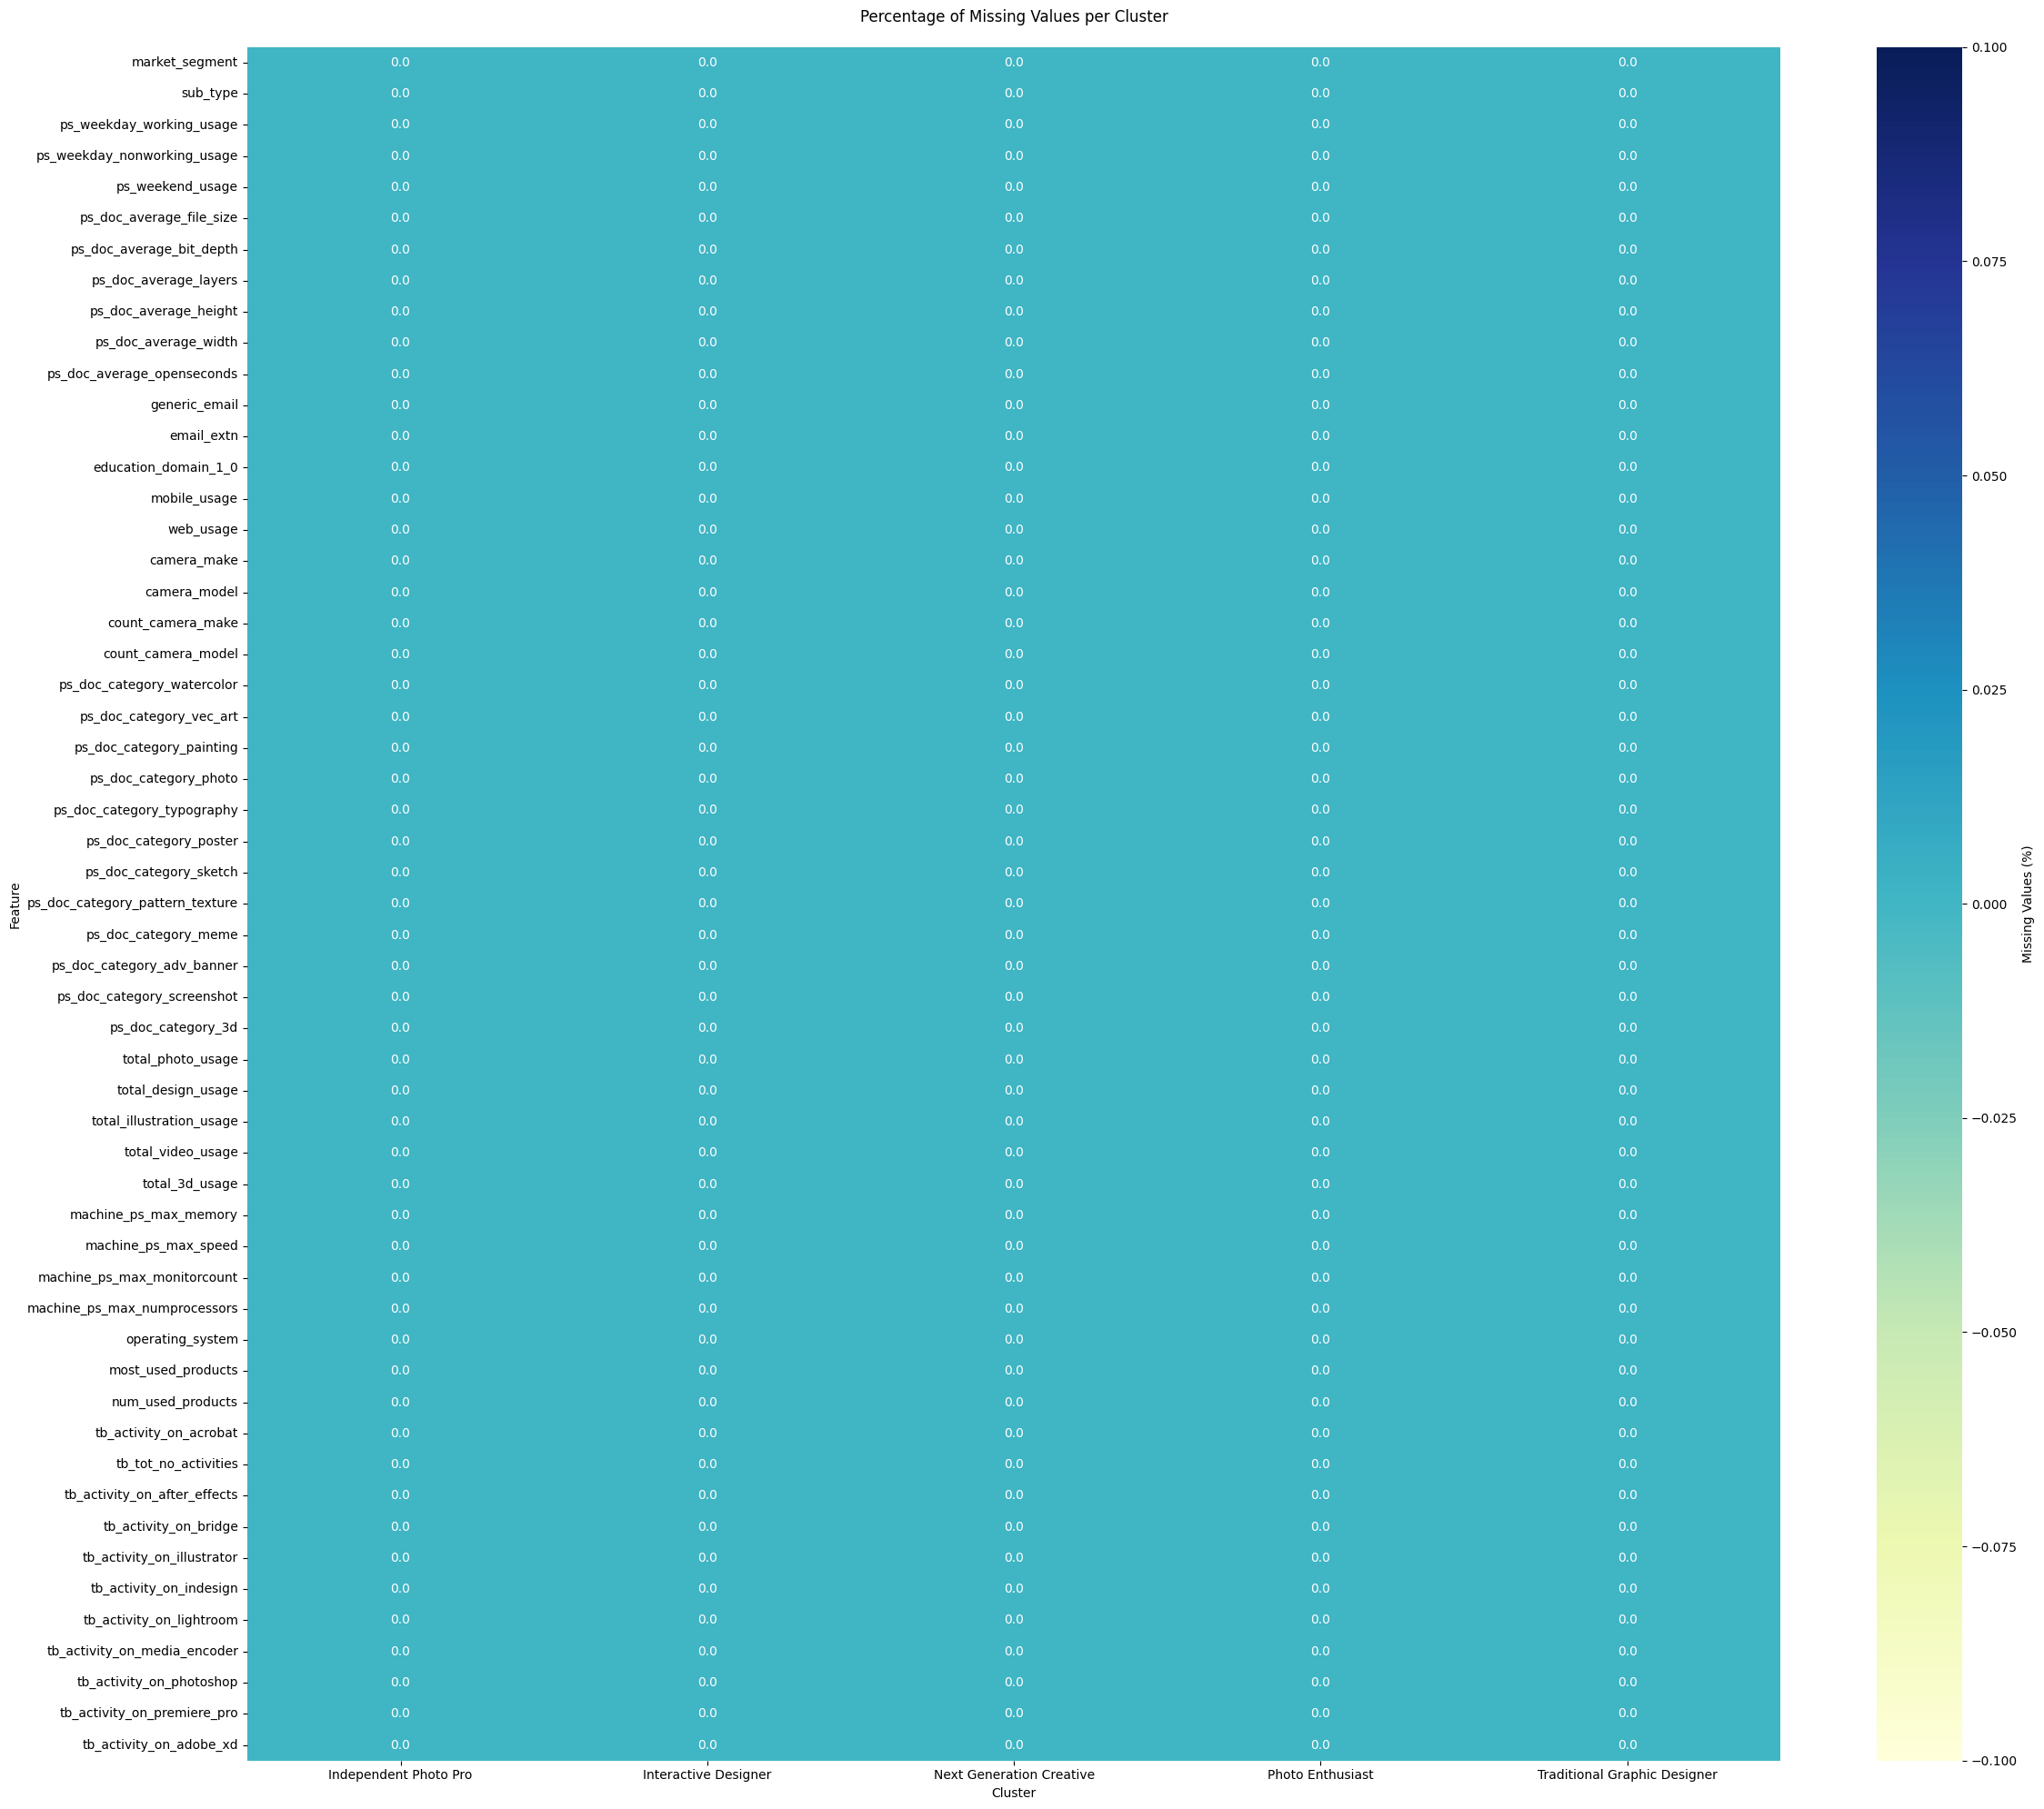

In [56]:
missing_stats = analyze_missing_values(df_dropped)
display(missing_stats) 

In [61]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12228 entries, 0 to 12248
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ps_cluster                       12228 non-null  object 
 1   market_segment                   12228 non-null  object 
 2   sub_type                         12228 non-null  object 
 3   ps_weekday_working_usage         12228 non-null  float64
 4   ps_weekday_nonworking_usage      12228 non-null  float64
 5   ps_weekend_usage                 12228 non-null  float64
 6   ps_doc_average_file_size         12228 non-null  float64
 7   ps_doc_average_bit_depth         12228 non-null  float64
 8   ps_doc_average_layers            12228 non-null  float64
 9   ps_doc_average_height            12228 non-null  float64
 10  ps_doc_average_width             12228 non-null  float64
 11  ps_doc_average_openseconds       12228 non-null  float64
 12  generic_email          

In [59]:
# filling with unknown! 
# List of columns to fill with 'unknown'
columns_to_fill = ['sv_job_collated', 'sv_skill_collated', 'sv_purpose_collated']

# Fill missing values in the specified columns with 'unknown'
df_filled_unknown = df_new.copy()
df_filled_unknown[columns_to_fill] = df_filled_unknown[columns_to_fill].fillna('unknown')

# Check the changes by reviewing missing values and the first few rows
print("\nMissing values after filling with 'unknown':")
print(df_filled_unknown[columns_to_fill].isnull().sum())
print("\nFirst few rows of the dataset after imputation:")
print(df_filled_unknown[columns_to_fill].head())



Missing values after filling with 'unknown':
sv_job_collated        0
sv_skill_collated      0
sv_purpose_collated    0
dtype: int64

First few rows of the dataset after imputation:
      sv_job_collated       sv_skill_collated sv_purpose_collated
0            hobbyist  all_three_skill_levels  me_nonprofessional
1             unknown                 unknown             unknown
2             unknown             experienced             unknown
3               other            intermediate        org_involved
4  printgraphicdesign             experienced        org_involved


C:\Users\mayuo\AppData\Local\Temp\ipykernel_31540\3753914557.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_cluster = (df.groupby(cluster_column)


,market_segment,sub_type,ps_weekday_working_usage,ps_weekday_nonworking_usage,ps_weekend_usage,sv_job_collated,sv_skill_collated,sv_purpose_collated,ps_doc_average_file_size,ps_doc_average_bit_depth,ps_doc_average_layers,ps_doc_average_height,ps_doc_average_width,ps_doc_average_openseconds,generic_email,email_extn,education_domain_1_0,mobile_usage,web_usage,camera_make,camera_model,count_camera_make,count_camera_model,ps_doc_category_watercolor,ps_doc_category_vec_art,ps_doc_category_painting,ps_doc_category_photo,ps_doc_category_typography,ps_doc_category_poster,ps_doc_category_sketch,ps_doc_category_pattern_texture,ps_doc_category_meme,ps_doc_category_adv_banner,ps_doc_category_screenshot,ps_doc_category_3d,total_photo_usage,total_design_usage,total_illustration_usage,total_video_usage,total_3d_usage,machine_ps_max_memory,machine_ps_max_speed,machine_ps_max_monitorcount,machine_ps_max_numprocessors,operating_system,most_used_products,num_used_products,tb_activity_on_acrobat,tb_tot_no_activities,tb_activity_on_after_effects,tb_activity_on_bridge,tb_activity_on_illustrator,tb_activity_on_indesign,tb_activity_on_lightroom,tb_activity_on_media_encoder,tb_activity_on_photoshop,tb_activity_on_premiere_pro,tb_activity_on_adobe_xd
ps_cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Independent Photo Pro,0.0,0.0,0.105,0.105,0.105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053,0.053,5.793,5.793,1.001,1.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interactive Designer,0.0,0.0,0.064,0.064,0.064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,4.971,4.971,0.255,0.255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Next Generation Creative,0.0,0.0,0.138,0.138,0.138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.034,0.034,7.084,7.084,4.092,4.092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Photo Enthusiast,0.0,0.0,0.028,0.028,0.028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.056,0.056,7.404,7.404,1.369,1.369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Traditional Graphic Designer,0.0,0.0,0.044,0.044,0.044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.044,0.044,4.839,4.839,0.748,0.748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


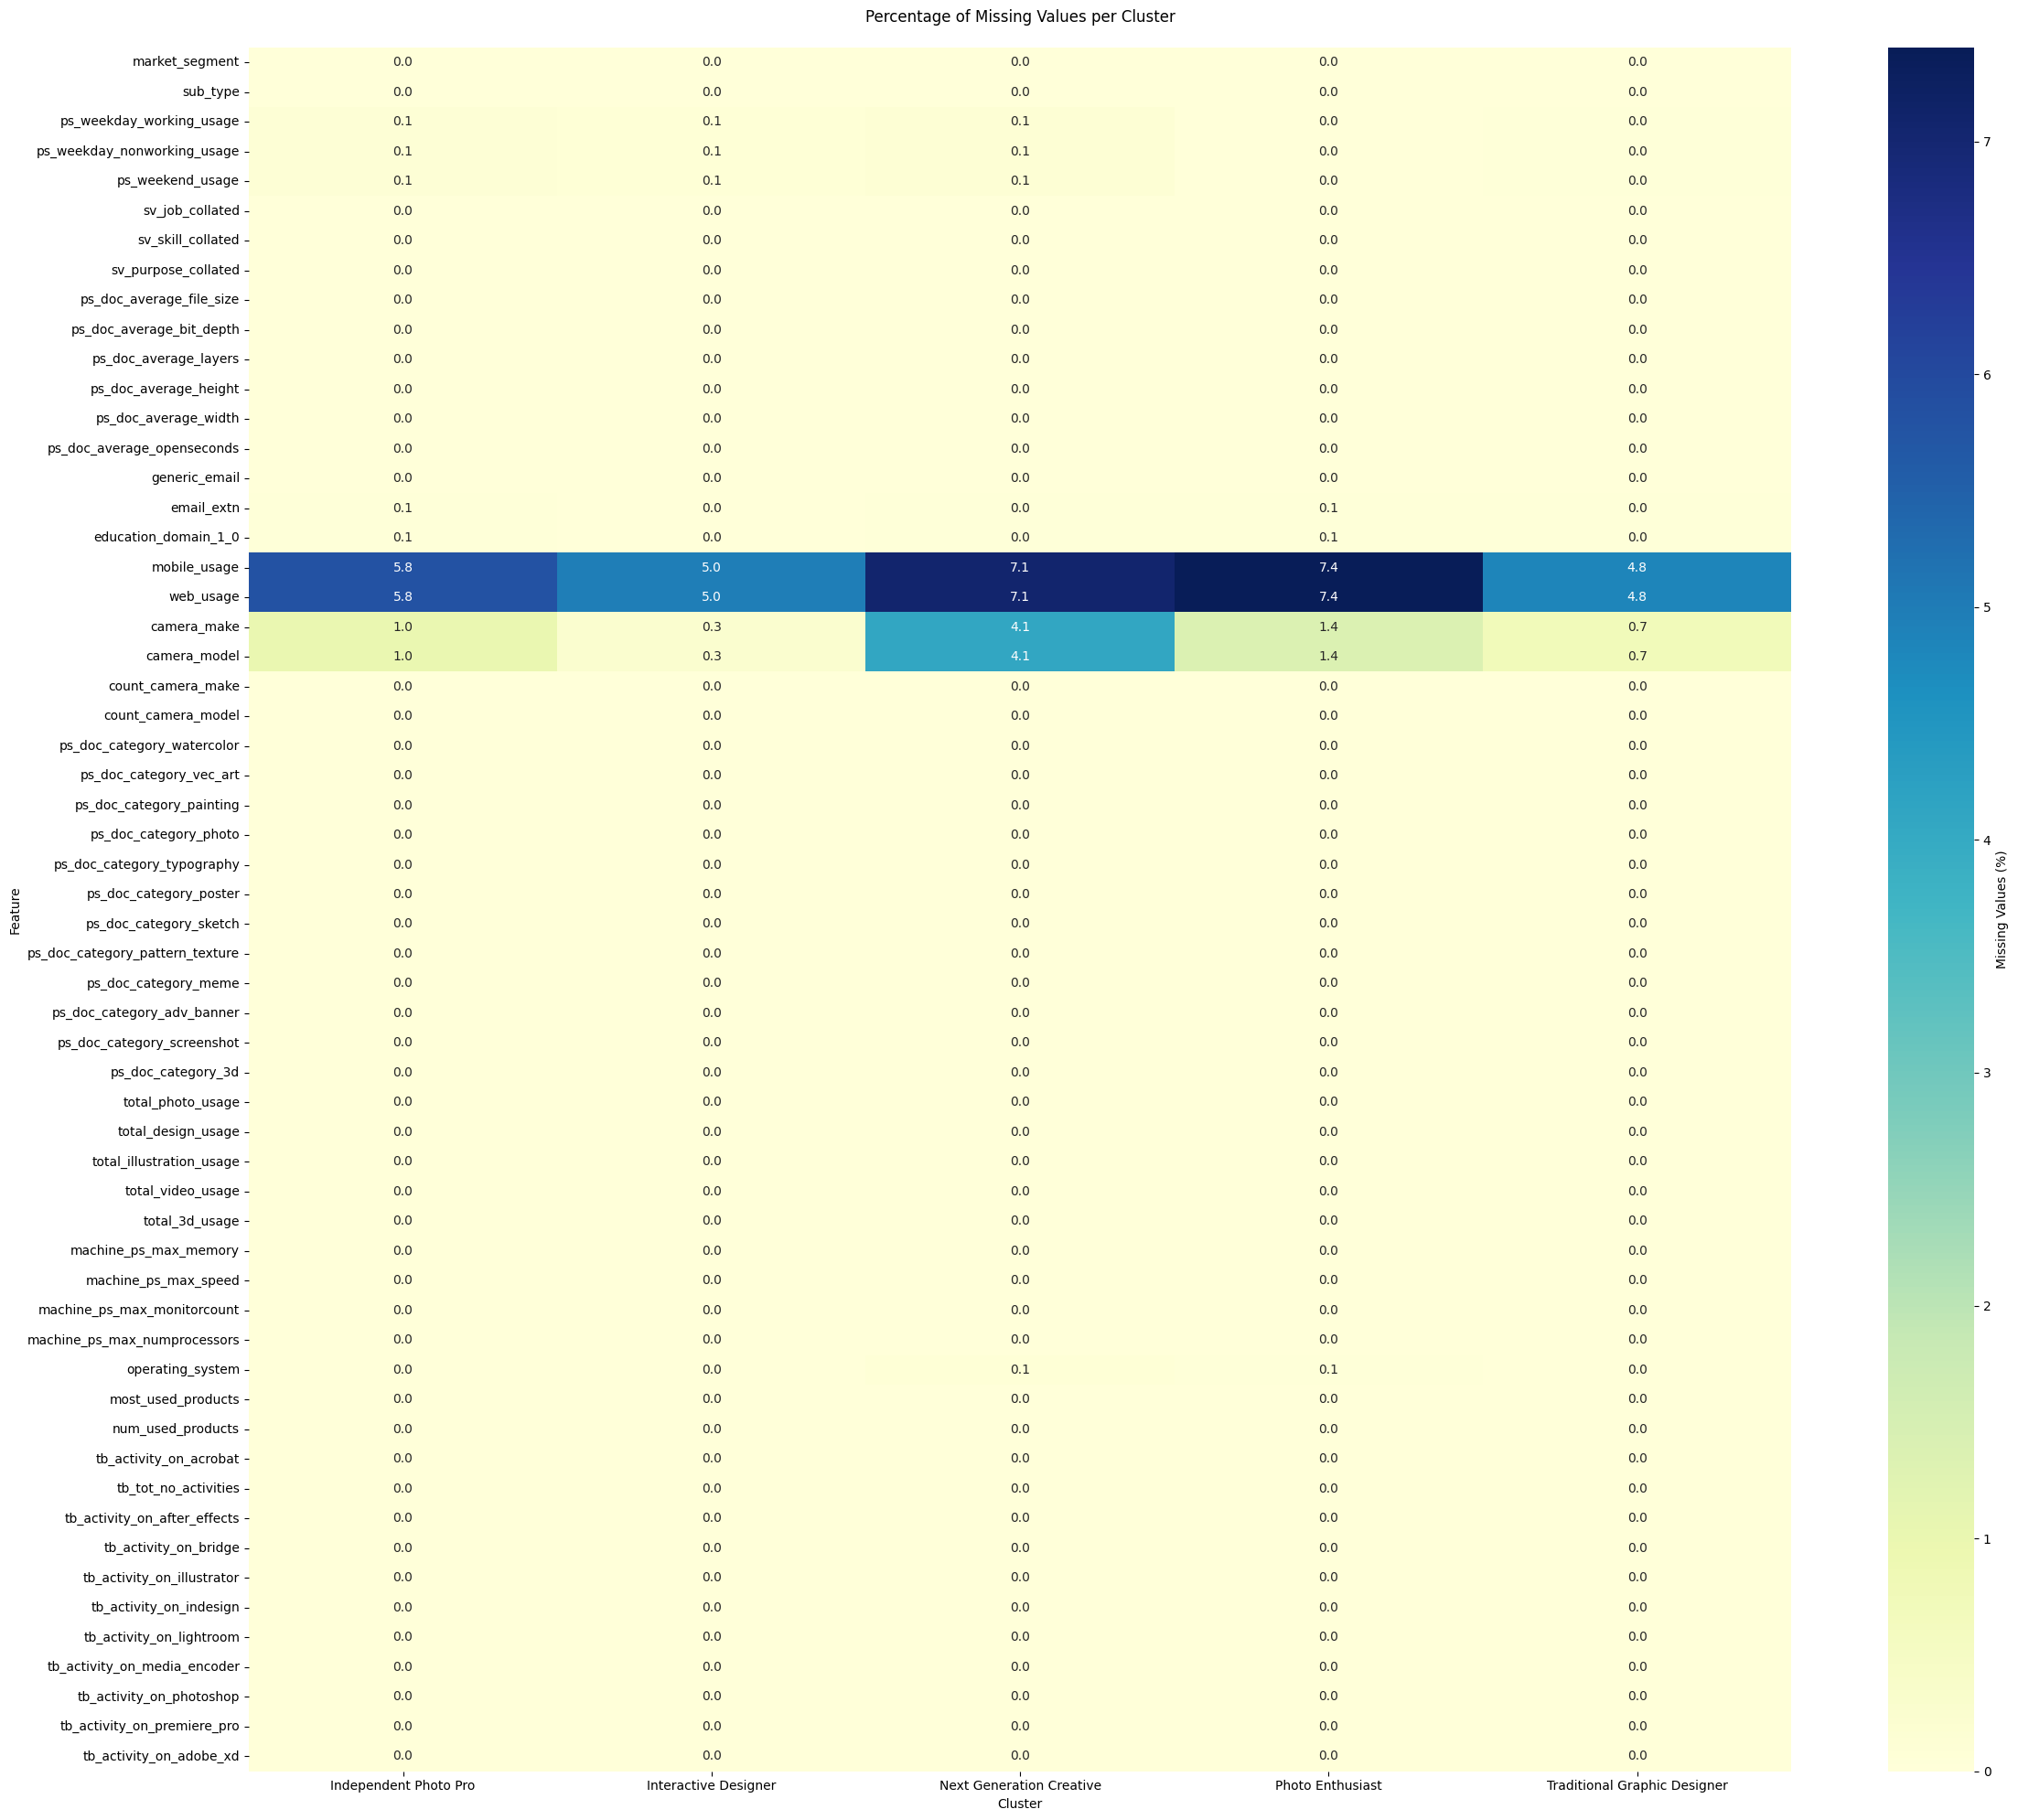

In [60]:
missing_stats = analyze_missing_values(df_filled_unknown)
display(missing_stats) 